## import requier libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import dataset

In [7]:
df = pd.read_csv("netflix_titles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Task #1: what is the most popular release year for movies on Netflix ?

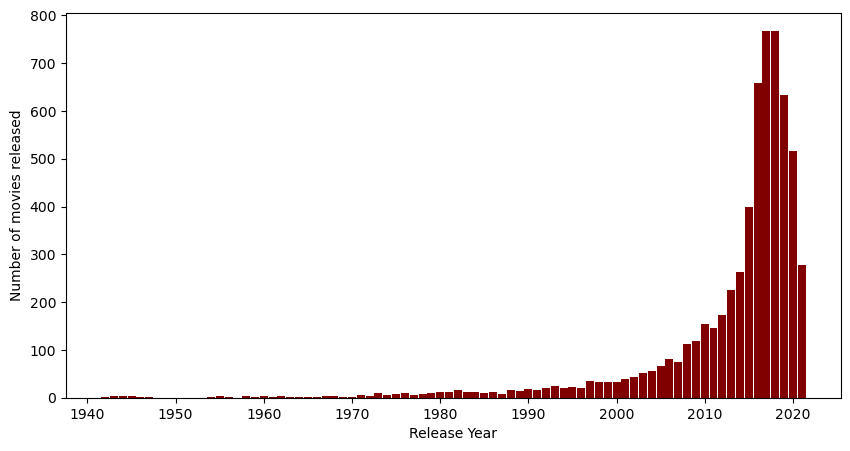

In [53]:
df['count']=1
movies_groued_by_year=(df[df['type']=='Movie'].groupby('release_year').sum().reset_index()[
    ['release_year', 'count']])    
#movies_groued_by_year
fig=plt.figure(figsize=(10,5))
plt.bar(movies_groued_by_year['release_year'],movies_groued_by_year['count'],
        color='maroon',width=0.9)
plt.xlabel('Release Year')
plt.ylabel('Number of movies released')
plt.show()


In [51]:
most_popular_release_year=df[df['type']=='Movie'].groupby('release_year')['release_year'].size().nlargest(n=2)
print(most_popular_release_year)

release_year
2017    767
2018    767
Name: release_year, dtype: int64


## Task #2: what year did netflix add the most content to its platform ?

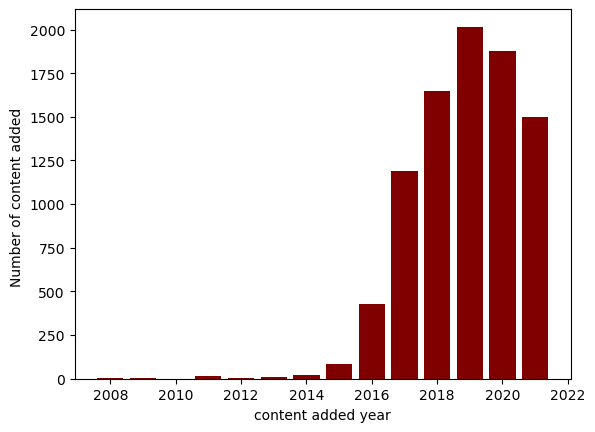

In [75]:
df['added_year']=pd.to_datetime(df['date_added']).dt.year
most_content_added_year=df.groupby('added_year').sum().reset_index()[['added_year','count']]
most_content_added_year['added_year']=most_content_added_year['added_year'].astype('int64')
plt.bar(most_content_added_year['added_year'],most_content_added_year['count'],color='maroon')
plt.xlabel('content added year')
plt.ylabel('Number of content added ')
plt.show()


In [81]:
most_content_added_year.nlargest(columns='count',n=5)

,added_year,count
11,2019,2016
12,2020,1879
10,2018,1649
13,2021,1498
9,2017,1188


## Task #3: Independent of year, what is the most popular month to add new content ? 

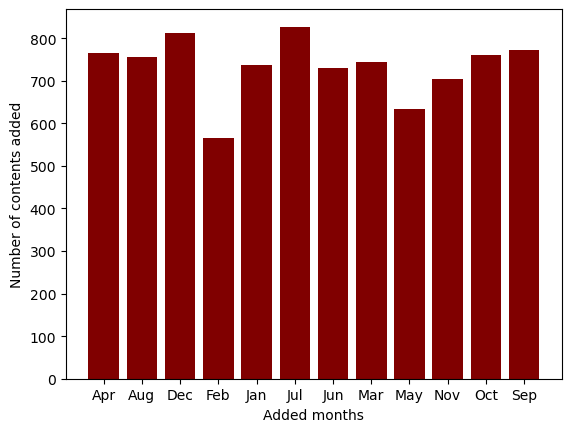

In [135]:
import calendar
df['added_month']=pd.to_datetime(df['date_added']).dt.month
df['added_month']=df['added_month'].fillna(method='ffill').astype('int32').apply(lambda x: calendar.month_abbr[x])
most_content_added_month=df.groupby('added_month')[['count']].sum().reset_index().sort_values(
    by='added_month')
plt.bar(most_content_added_month['added_month'],most_content_added_month['count'],color='maroon')
plt.xlabel('Added months')
plt.ylabel('Number of contents added')
plt.show()

In [138]:
most_content_added_month.nlargest(columns='count',n=3)

,added_month,count
5,Jul,827
2,Dec,813
11,Sep,772
